# <span style="color: yellow;">Problem Statement</span>


### The goal is to understand the relationship between various body measurements (like age, weight, height, circumferences) and body density using regression analysis. This analysis aims to predict body density based on these measurements, enabling a potentially less invasive way to assess body composition. EDA will be employed to explore data distributions, uncover potential correlations, and assess the suitability of features for regression modeling. Finally, a regression model will be built and evaluated on the data using techniques like train/test splitting. The insights from EDA will further guide the model development for improved prediction accuracy.


# <span style="color: yellow;">Importing Libreries </span>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson


# <span style="color: yellow;">Importing Data</span>


In [3]:
data = pd.read_csv("dataset.csv")
data=data.drop(columns=["Density"])

In [4]:

data.head(10)

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class,Gender
0,23,69.97,172.09,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3,1
1,22,78.58,183.52,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1,1
2,22,69.85,168.28,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3,0
3,26,83.80,183.52,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4,1
4,24,83.57,180.98,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7,1
5,24,95.37,189.87,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8,20.9,0
6,26,82.10,177.17,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7,19.2,0
7,25,79.83,184.15,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8,12.4,0
8,25,86.64,187.96,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2,4.1,0
9,23,89.92,186.69,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2,11.7,0



# <span style="color: yellow;">Checking For empty data</span>


In [5]:
data.isnull().sum()

Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
class      0
Gender     0
dtype: int64

<Axes: >

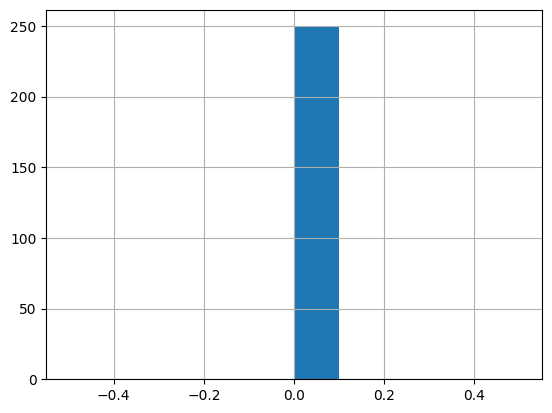

In [6]:
data.isnull().sum(axis=1).hist()

#### Conclusion: There are no empty fields


# <span style="color: yellow;">Exploratory Data Analysis</span>


##  <span style="color: pink;">Datatypes of the features</span>


In [7]:
# Get the information of the dataframe
print("\nInformation of the dataframe:\n")
print(data.info())



Information of the dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      249 non-null    int64  
 1   Weight   249 non-null    float64
 2   Height   249 non-null    float64
 3   Neck     249 non-null    float64
 4   Chest    249 non-null    float64
 5   Abdomen  249 non-null    float64
 6   Hip      249 non-null    float64
 7   Thigh    249 non-null    float64
 8   Knee     249 non-null    float64
 9   Ankle    249 non-null    float64
 10  Biceps   249 non-null    float64
 11  Forearm  249 non-null    float64
 12  Wrist    249 non-null    float64
 13  class    249 non-null    float64
 14  Gender   249 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 29.3 KB
None


## <span style="color: pink;">Description of numerical features</span>


In [8]:
# Generate descriptive statistics for numerical features
print("\nSummary statistics for numerical columns:\n")
print(data.describe())



Summary statistics for numerical columns:

              Age      Weight      Height        Neck       Chest     Abdomen  \
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000   
mean    44.550201   81.070602  178.220683   37.973494  100.706426   92.380723   
std     12.299296   13.379370    9.335568    2.437629    8.409952   10.717744   
min     22.000000   53.750000   74.930000   31.100000   79.300000   69.400000   
25%     35.000000   71.780000  173.360000   36.400000   94.200000   84.500000   
50%     43.000000   79.830000  177.800000   37.900000   99.600000   90.900000   
75%     53.000000   89.360000  183.520000   39.400000  105.300000   99.100000   
max     81.000000  164.720000  197.490000   51.200000  136.200000  148.100000   

              Hip       Thigh        Knee       Ankle      Biceps     Forearm  \
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000   
mean    99.877108   59.416466   38.569076   23.104418   32.27871

## <span style="color: pink;">Finding outliers in target variable (charges)</span>



Number of outliers in 'charges': 1


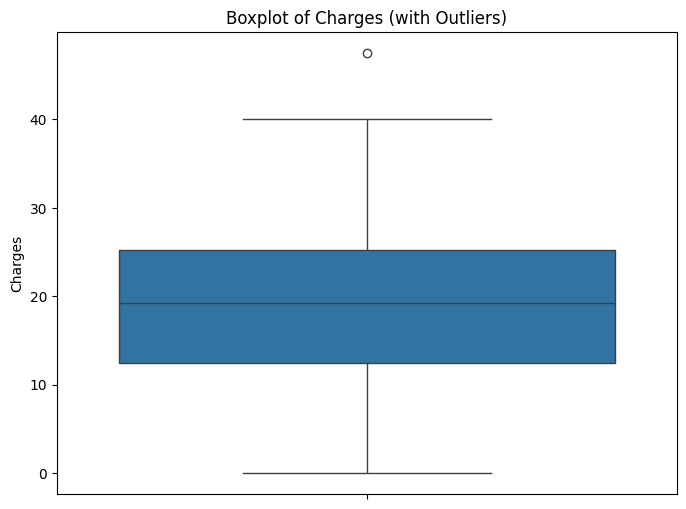

In [9]:
# Detect outliers using IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers = find_outliers_iqr(data, 'class')  # Replace 'charges' with the column of interest
print(f"\nNumber of outliers in 'charges': {len(outliers)}")



# Boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='class')
plt.title("Boxplot of Charges (with Outliers)")
plt.ylabel("Charges")
plt.show()




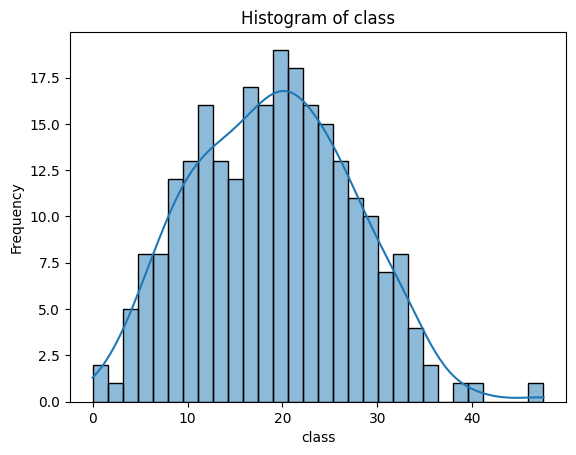

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the 'charges' column
sns.histplot(data['class'], kde=True, bins=30)  # kde=True adds a Kernel Density Estimate curve
plt.title('Histogram of class')
plt.xlabel('class')
plt.ylabel('Frequency')
plt.show()


## <span style="color: pink;">Distribution of Numerical Features </span>


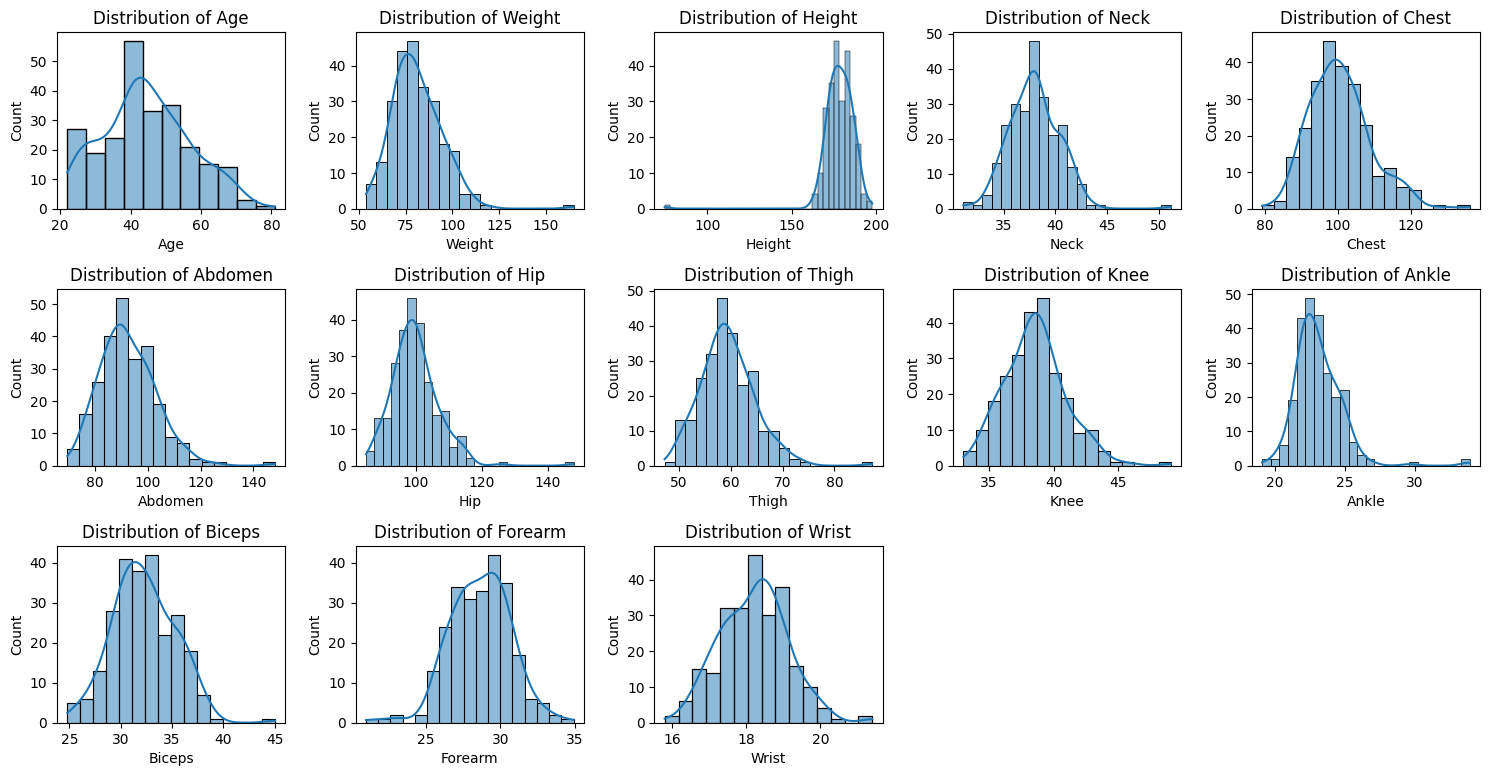

In [11]:
# Histograms for numerical features
numerical_features = ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

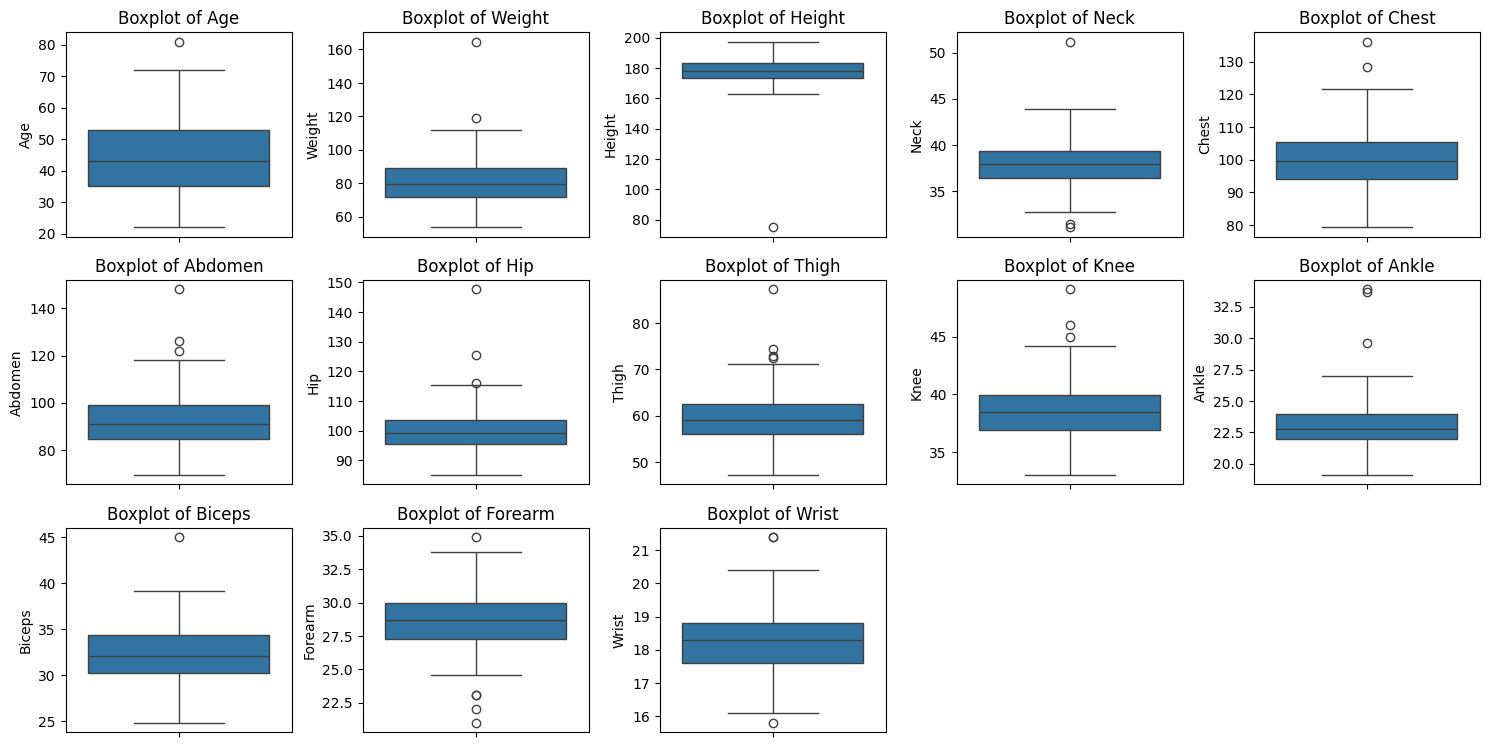

In [12]:
# Box plots for numerical features to detect outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

## <span style="color: pink;">Distribution of Catagorical features</span>


C:\Users\biswajit\AppData\Local\Temp\ipykernel_12516\2430166055.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


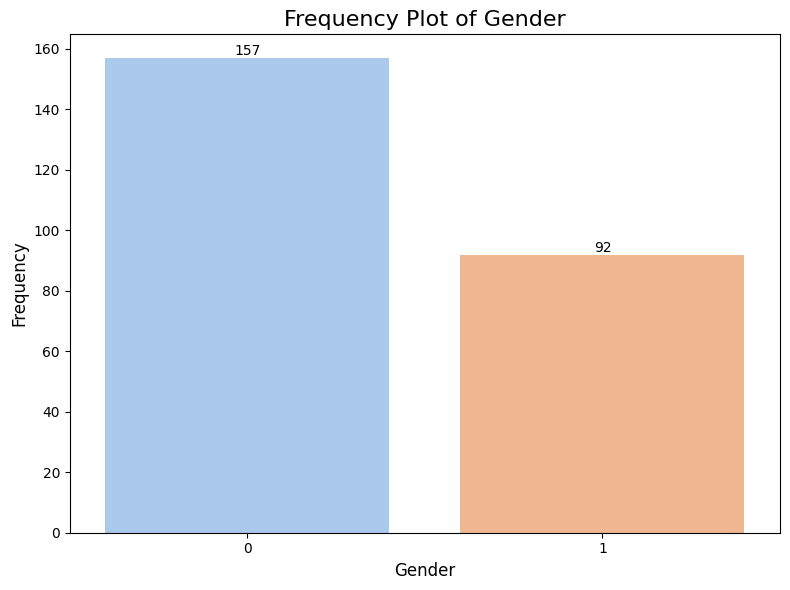

Gender Counts:
Gender
0    157
1     92
Name: count, dtype: int64


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset.csv')

# Assuming 'df' is your DataFrame
plt.figure(figsize=(8, 6))

# Create the frequency plot using Seaborn
sns.countplot(data=df, x='Gender', palette='pastel')

# Adding labels and title
plt.title('Frequency Plot of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

# Calculate and display counts
gender_counts = df['Gender'].value_counts()
for index, count in gender_counts.items():
    plt.text(index, count, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

# Print counts separately for clarity (optional)
print("Gender Counts:")
print(gender_counts)

## <span style="color: pink;"> Correlation Analysis</span>


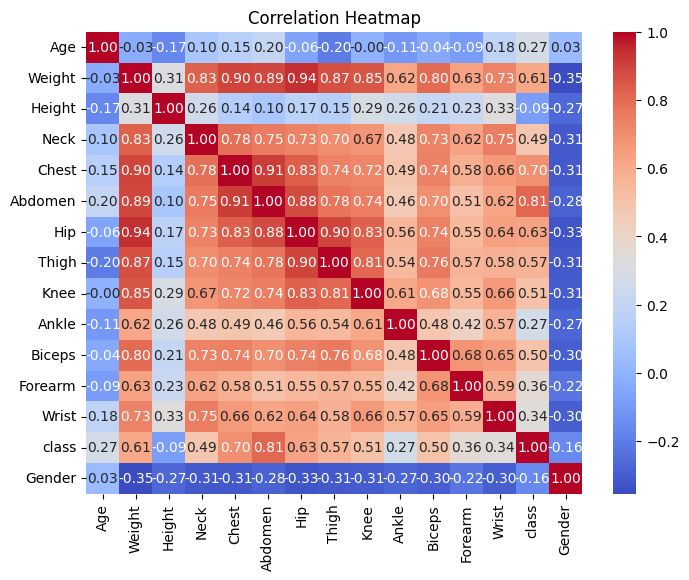

In [14]:
import seaborn as sns
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Display correlations
# print("\nCorrelation matrix:\n", correlation_matrix)
# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


##  <span style="color: pink;">Feature Comparisons</span>


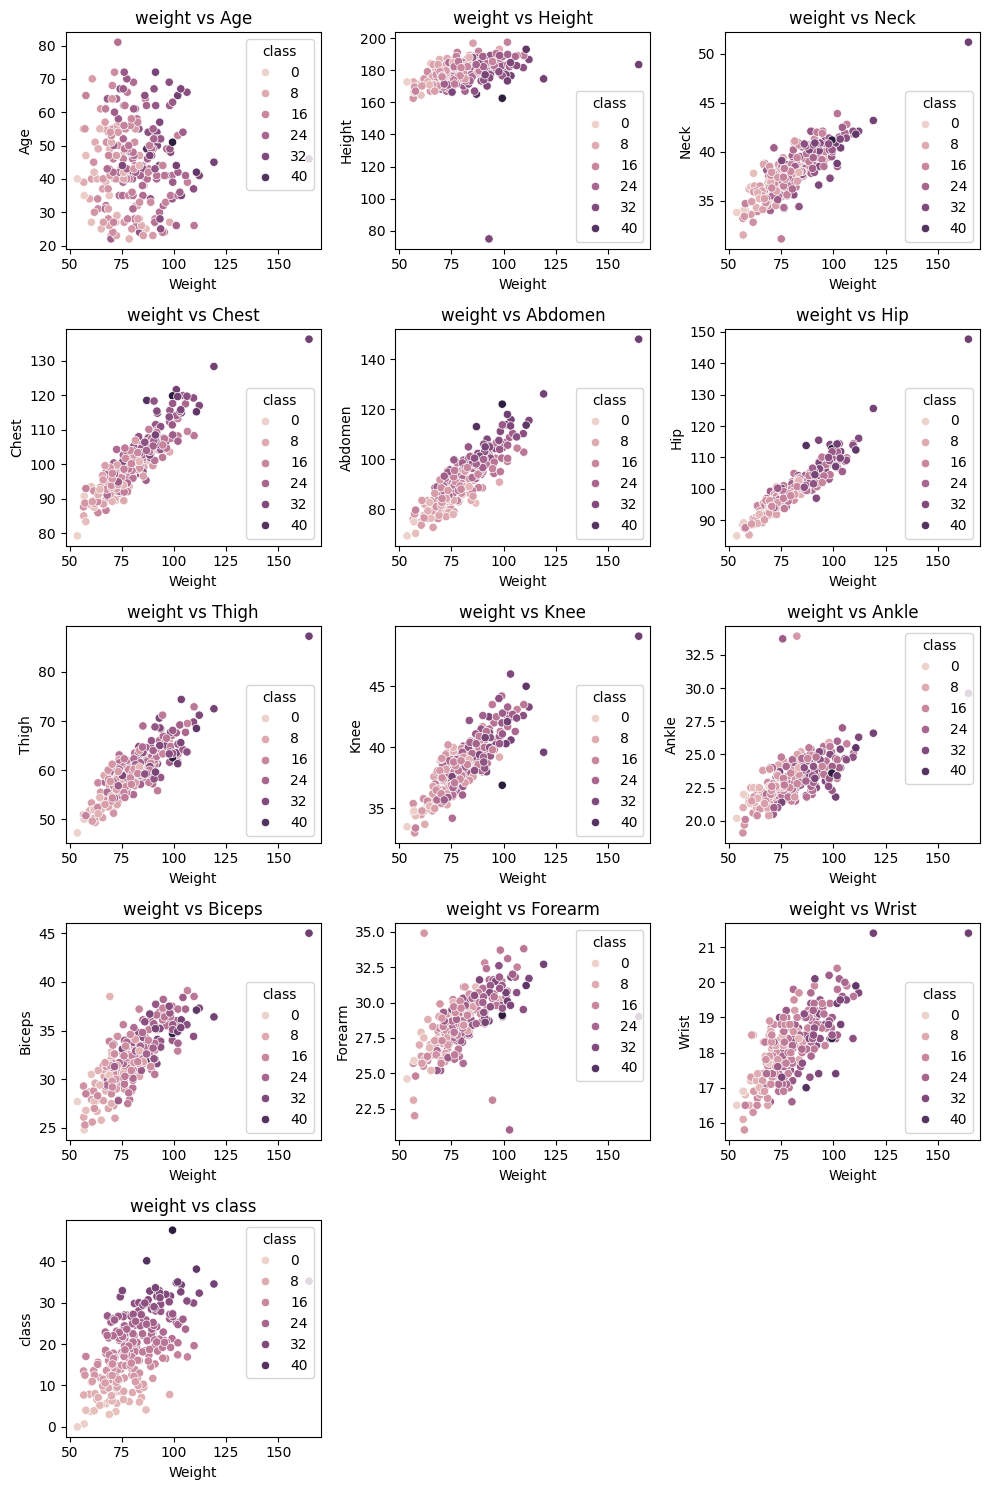

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# List of numerical features (excluding 'Density')
numerical_features = ['Age', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'class']

# Create a figure and subplots
num_plots = len(numerical_features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols 
plt.figure(figsize=(10, 3 * num_rows))

# Generate scatter plots in subplots
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.scatterplot(x='Weight', y=feature, data=data, hue='class')
    plt.title(f'weight vs {feature}')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

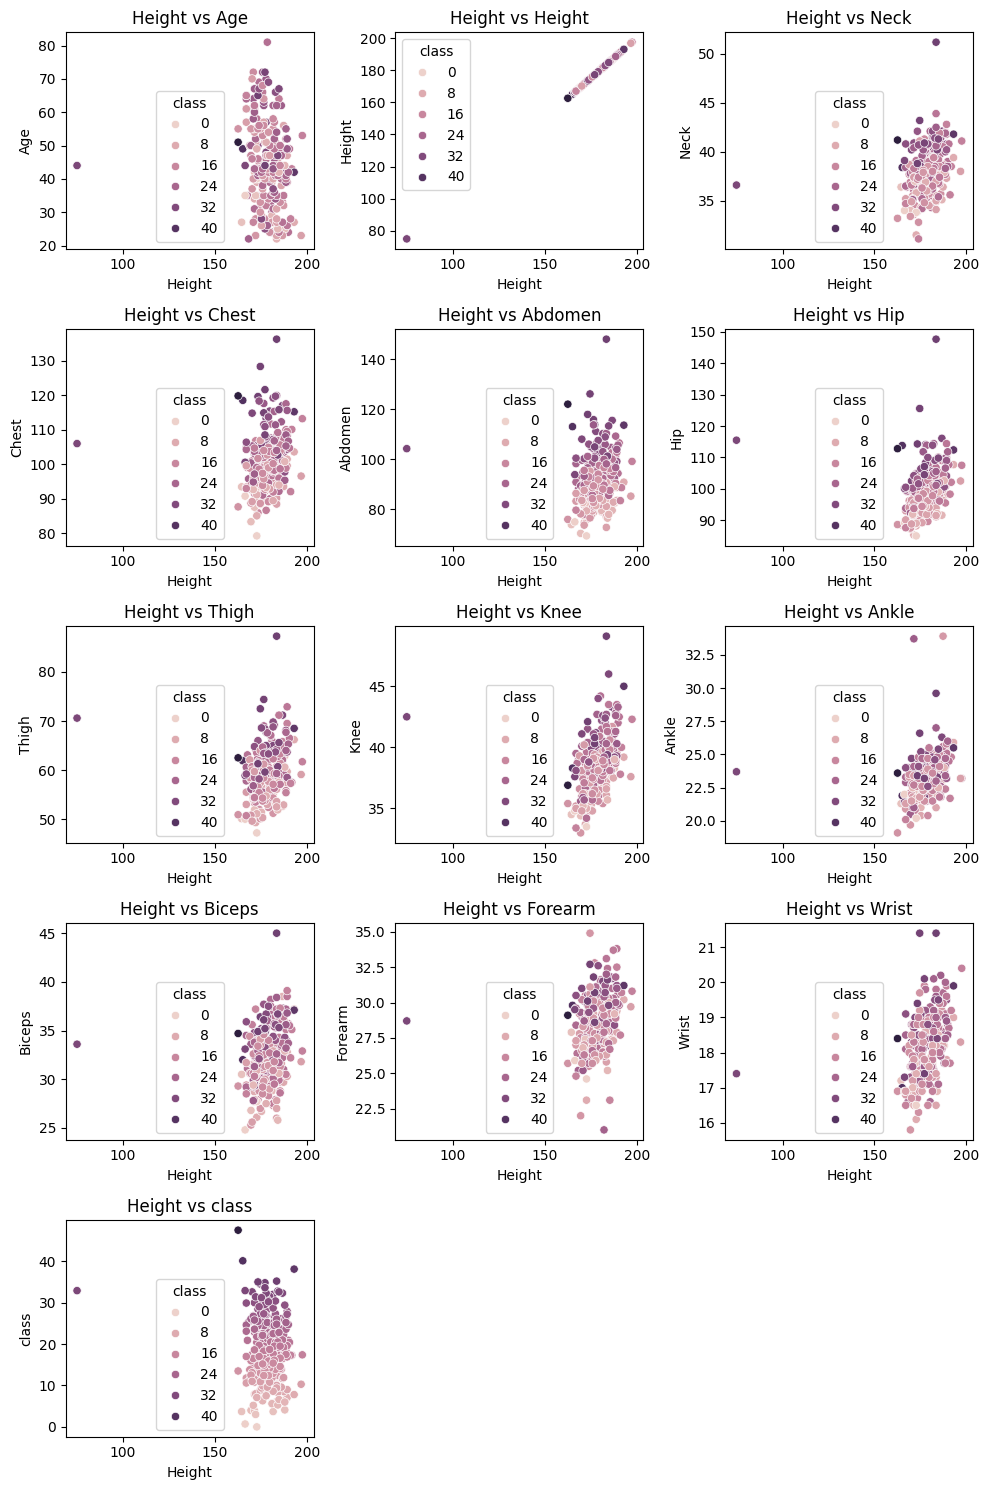

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# List of numerical features (excluding 'Density')
numerical_features = ['Age', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'class']

# Create a figure and subplots
num_plots = len(numerical_features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols 
plt.figure(figsize=(10, 3 * num_rows))

# Generate scatter plots in subplots
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.scatterplot(x='Height', y=feature, data=data, hue='class')
    plt.title(f'Height vs {feature}')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

# <span style="color: yellow;">Regression Analysis</span>


In [17]:
data.dtypes

Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
class      float64
Gender       int64
dtype: object

## <span style="color: pink;">OLS estimation</span>


In [18]:
# Define the target variable (Y) and regressors (X)
X = data.drop(columns=['class'])  # Regressors: all columns except 'charges'
y = data['class']  # Target variable: 'charges'


In [19]:
X.shape

(249, 14)

In [20]:

# Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# Print the summary of the OLS regression
print(ols_model.summary())


                                 OLS Regression Results                                
Dep. Variable:                  class   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              398.9
Date:                Wed, 18 Dec 2024   Prob (F-statistic):                   5.74e-155
Time:                        18:58:09   Log-Likelihood:                         -709.13
No. Observations:                 249   AIC:                                      1446.
Df Residuals:                     235   BIC:                                      1495.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [21]:
# Ensure y_normalized and y_pred are 1D arrays
y_pred = ols_model.predict(X)  # Flatten to 1D array
u_hat = y - y_pred  # Calculate residuals

# Print the first few values of y_pred and u_hat
print("Predicted values (y_pred):")
print(y_pred[:5])  # First 5 predicted values
print("\nResiduals (u_hat):")
print(u_hat[:5])  # First 5 residuals


Predicted values (y_pred):
0    16.387103
1     8.857914
2    18.313887
3    12.048348
4    27.460317
dtype: float64

Residuals (u_hat):
0   -4.087103
1   -2.757914
2    6.986113
3   -1.648348
4    1.239683
dtype: float64


In [22]:
print(f"Actual bodyfat of 103rd individual : {y[102]}")
print(f"Predicted bodyfat of 103rd individual : {y_pred[102]}")

Actual bodyfat of 103rd individual : 20.1
Predicted bodyfat of 103rd individual : 17.383159797229922


##  <span style="color: pink;">Test for Heteroskedasticity</span>


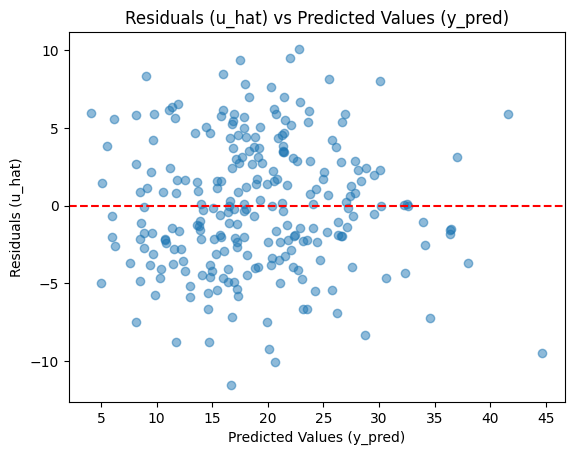

In [23]:
import matplotlib.pyplot as plt

# Plot u_hat vs y_pred
plt.scatter(y_pred, u_hat, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Line at y = 0
plt.title('Residuals (u_hat) vs Predicted Values (y_pred)')
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals (u_hat)')
plt.show()


In [24]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Perform the Goldfeld-Quandt test for heteroskedasticity
gq_test_result = het_goldfeldquandt(u_hat, X)

# Extract the test statistic and p-value
gq_test_stat = gq_test_result[0]
gq_test_p_value = gq_test_result[1]

# Display the result of the test
print(f"Goldfeld-Quandt Test Statistic: {gq_test_stat}")
print(f"Goldfeld-Quandt p-value: {gq_test_p_value}")

# Conclusion
if gq_test_p_value < 0.05:
    print("There is heteroskedasticity (reject the null hypothesis of homoskedasticity).")
else:
    print("There is no heteroskedasticity (fail to reject the null hypothesis of homoskedasticity).")


Goldfeld-Quandt Test Statistic: 1.1351833916521799
Goldfeld-Quandt p-value: 0.25301248368804397
There is no heteroskedasticity (fail to reject the null hypothesis of homoskedasticity).


##  <span style="color: pink;">Test for Endogeneity</span>


In [25]:

# Calculate the correlation between y_pred (predicted values) and u_hat (residuals)
correlation = np.corrcoef(y_pred, u_hat)[0, 1]

# Display the correlation value
print(f"Correlation between y_pred and u_hat: {correlation}")

# Conclusion
if abs(correlation) < 0.1:
    print("There is no endogeneity (correlation is close to 0).")
else:
    print("There is endogeneity (correlation is significantly different from 0).")


Correlation between y_pred and u_hat: 0.002384014315947323
There is no endogeneity (correlation is close to 0).


##  <span style="color: pink;">MultiColinearity</span>


In [26]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant to the feature set (for intercept term)
X = data.drop('class', axis=1)  # Excluding target variable 'charges'
X = add_constant(X)  # Adds a column of ones for the intercept term

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print("VIF Values:")
print(vif_data)

# Conclusion based on VIF values
vif_conclusion = "\nNo multicollinearity concerns:\n"
for index, row in vif_data.iterrows():
    if row['VIF'] > 10:
        vif_conclusion += f"Feature '{row['feature']}' has high multicollinearity (VIF > 10).\n"
    elif row['VIF'] > 5:
        vif_conclusion += f"Feature '{row['feature']}' has moderate multicollinearity (VIF > 5).\n"
    else:
        vif_conclusion += f"Feature '{row['feature']}' has no significant multicollinearity (VIF < 5).\n"

# Output the conclusion
print(vif_conclusion)


VIF Values:
    feature          VIF
0     const  4249.290811
1       Age     2.125559
2    Weight    33.656429
3    Height     1.730267
4      Neck     4.315047
5     Chest     9.346952
6   Abdomen    11.673207
7       Hip    15.103330
8     Thigh     7.905555
9      Knee     4.684875
10    Ankle     1.918005
11   Biceps     3.651999
12  Forearm     2.186506
13    Wrist     3.366133
14   Gender     1.198422

No multicollinearity concerns:
Feature 'const' has high multicollinearity (VIF > 10).
Feature 'Age' has no significant multicollinearity (VIF < 5).
Feature 'Weight' has high multicollinearity (VIF > 10).
Feature 'Height' has no significant multicollinearity (VIF < 5).
Feature 'Neck' has no significant multicollinearity (VIF < 5).
Feature 'Chest' has moderate multicollinearity (VIF > 5).
Feature 'Abdomen' has high multicollinearity (VIF > 10).
Feature 'Hip' has high multicollinearity (VIF > 10).
Feature 'Thigh' has moderate multicollinearity (VIF > 5).
Feature 'Knee' has no signifi

##  <span style="color: pink;">Test for Normality of Residuals</span>


##### Q-Q plot

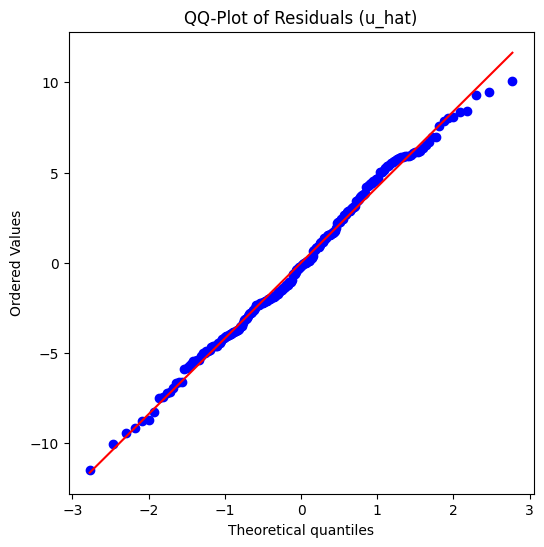

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import jarque_bera
import scipy.stats as stats

# Create the QQ-Plot
plt.figure(figsize=(6, 6))
stats.probplot(u_hat, dist="norm", plot=plt)
plt.title('QQ-Plot of Residuals (u_hat)')
plt.show()


##### Jarque-Bera test

In [28]:

# Perform the Jarque-Bera test
jb_test_result = jarque_bera(u_hat)

# Display the result of the Jarque-Bera test
print(f"Jarque-Bera test statistic: {jb_test_result[0]}")
print(f"Jarque-Bera p-value: {jb_test_result[1]}")

# Conclusion based on p-value
if jb_test_result[1] < 0.05:
    print("Reject the null hypothesis: Residuals are not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Residuals are normally distributed.")

Jarque-Bera test statistic: 2.0031582740579688
Jarque-Bera p-value: 0.36729896756799313
Fail to reject the null hypothesis: Residuals are normally distributed.
